# Dubai Apartment Sale Prices and Venues Analysis

## 1- Apartments Prices Collection and Examination

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [11]:

body = client_ba1394ad0e4f43a5bfba09747cc91d5c.get_object(Bucket='torontocluster-donotdelete-pr-fhvu9ypbw5ou5l',Key='reg2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_8 = pd.read_csv(body)
df_data_8.head()


,Bedrooms,Price_Sqft
0,1,936
1,0,1108
2,1,750
3,2,684
4,0,706


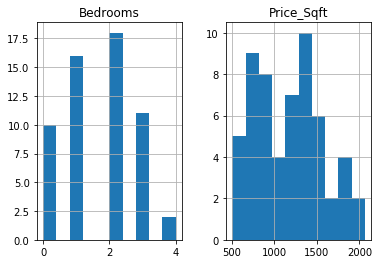

In [14]:
viz = df_data_8[['Bedrooms','Price_Sqft']]
viz.hist()
plt.show()

In [13]:
df_data_8.describe()

,Bedrooms,Price_Sqft
count,57.000000,57.000000
mean,1.631579,1178.157895
std,1.095960,401.061217
min,0.000000,508.000000
25%,1.000000,834.000000
50%,2.000000,1176.000000
75%,2.000000,1437.000000
max,4.000000,2063.000000


## 2- Latitude and Longtitude and Apartment Sale Price 

### Only 1-Bedroom apartment type is chosen for the price allocated to locations

In [25]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files



import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Libraries imported.


### Table head of the latitudes and longtitdes with prices per sqft

In [26]:
# The code was removed by Watson Studio for sharing.

,Name,Price/Sqft,longitude,latitude
0,AlFurjan,936,55.1459,25.0252
1,AlQuoz,876,55.2508,25.1514
2,BusinessBay,1287,55.2729,25.1832
3,CulturalVillage,1130,55.3379,25.2251
4,DIFC,1398,55.2770,25.2088


In [27]:

body = client_ba1394ad0e4f43a5bfba09747cc91d5c.get_object(Bucket='torontocluster-donotdelete-pr-fhvu9ypbw5ou5l',Key='dxb Locations1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Location,Price/Sqft,Longitude,Latitude
0,Al Furjan,936,55.1459,25.0252
1,Al Quoz,876,55.2508,25.1514
2,Business Bay,1287,55.2729,25.1832
3,Cultural Village,1130,55.3379,25.2251
4,DIFC,1398,55.2770,25.2088


In [28]:
df_data_0.shape[0]

23

## 3- Map Marker

In [29]:
!pip install folium
import folium

     |████████████████████████████████| 102kB 6.7MB/s ta 0:00:011


In [30]:
folium.Map?

In [31]:
folium.Map

folium.folium.Map

In [32]:


# create map
map_df_data_0 = folium.Map(location=[25.2048, 55.2708], width=800, height=400, zoom_start=11)

# plot locations
for (index, row) in df_data_0.iterrows():
    folium.Marker(location=[row.loc['Latitude'], row.loc['Longitude']], 
                  popup=row.loc['Location'], 
                  tooltip='click').add_to(map_df_data_0)
    
# display map    
map_df_data_0

## 3- Foursquare API

In [9]:
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
import requests

In [10]:
body = client_ba1394ad0e4f43a5bfba09747cc91d5c.get_object(Bucket='torontocluster-donotdelete-pr-fhvu9ypbw5ou5l',Key='dxb Locations1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Location,Price/Sqft,Longitude,Latitude
0,Al Furjan,936,55.1459,25.0252
1,Al Quoz,876,55.2508,25.1514
2,Business Bay,1287,55.2729,25.1832
3,Cultural Village,1130,55.3379,25.2251
4,DIFC,1398,55.2770,25.2088


In [11]:
body = client_ba1394ad0e4f43a5bfba09747cc91d5c.get_object(Bucket='torontocluster-donotdelete-pr-fhvu9ypbw5ou5l',Key='dxb Locations1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
Locations_subset = df_data_0
Locations_subset.head()

,Location,Price/Sqft,Longitude,Latitude
0,Al Furjan,936,55.1459,25.0252
1,Al Quoz,876,55.2508,25.1514
2,Business Bay,1287,55.2729,25.1832
3,Cultural Village,1130,55.3379,25.2251
4,DIFC,1398,55.2770,25.2088


In [12]:
CLIENT_ID = 'VJJFPU5PDS2U2TQHSBDYLBV4ETJATSJIQZVRZASMQY11UJJZ' # your Foursquare ID
@hidden_cell CLIENT_SECRET = 'YJAJEGPBTIZGTSDT2AHRRBFW2JVBXNF3OCMLXM5KJ0RLCD2M' # your Foursquare Secret
VERSION = '20200511'
LIMIT = 30

Location_name = Locations_subset.loc[0 , 'Location']
Location_latitude = Locations_subset.loc[0, 'Latitude'] 
Location_longitude = Locations_subset.loc[0, 'Longitude'] 
# limit of number of venues returned by Foursquare API
LIMIT = 30 
radius = 600

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Location_latitude, 
    Location_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5eb96ebcf7706a001b55f75d'}, 'response': {'venues': [{'id': '5762ade5498eff2dcb8caf46', 'name': 'The club masakin pool', 'location': {'address': 'Discovery Gardens', 'lat': 25.030305, 'lng': 55.149329, 'labeledLatLngs': [{'label': 'display', 'lat': 25.030305, 'lng': 55.149329}], 'distance': 665, 'cc': 'AE', 'city': 'دبي', 'state': 'دبي', 'country': 'الإمارات العربية المتحدة', 'formattedAddress': ['Discovery Gardens', 'دبي', 'الإمارات العربية المتحدة']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1589210792', 'hasPerk': False}, {'id': '55227dfb498e16e902db1cf5', 'name': 'Al Furjan Villas', 'location': {'crossStreet': 'Gardens Avenue', 'lat': 25.02476983335219, 'lng': 55.13622810241121, 'labeledLatLngs': [{'label': 'display', 'lat': 25.02476983335219, 

In [13]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d15e941735', 'name': 'P...",False,5762ade5498eff2dcb8caf46,Discovery Gardens,AE,دبي,الإمارات العربية المتحدة,NaN,665,"[Discovery Gardens, دبي, الإمارات العربية المت...","[{'label': 'display', 'lat': 25.030305, 'lng':...",25.030305,55.149329,NaN,دبي,The club masakin pool,v-1589210792
1,"[{'id': '4f2a210c4b9023bd5841ed28', 'name': 'H...",False,55227dfb498e16e902db1cf5,NaN,AE,دبي,الإمارات العربية المتحدة,Gardens Avenue,976,"[Gardens Avenue, دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.02476983335219...",25.024770,55.136228,NaN,دبي,Al Furjan Villas,v-1589210792
2,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,5a0b08431ffe977ca5bbd335,NaN,AE,دبي,الإمارات العربية المتحدة,NaN,734,"[دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.02579597054439...",25.025796,55.153150,NaN,دبي,Al Furjan Club,v-1589210792
3,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",False,586917f00037eb49445df020,Al-Furjan,AE,دبي,الإمارات العربية المتحدة,NaN,710,"[Al-Furjan, دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.02463086632084...",25.024631,55.152914,NaN,دبي,Al Furjan Pavilion,v-1589210792
4,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",False,59c7c86b2bf9a9165f0479c9,7th St,AE,دبي,الإمارات العربية المتحدة,NaN,1078,"[7th St, دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.03483131364094...",25.034831,55.147098,Discovery Gardens,دبي,Carrefour Market,v-1589210792


In [14]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,state,id
0,The club masakin pool,Pool,Discovery Gardens,AE,دبي,الإمارات العربية المتحدة,NaN,665,"[Discovery Gardens, دبي, الإمارات العربية المت...","[{'label': 'display', 'lat': 25.030305, 'lng':...",25.030305,55.149329,NaN,دبي,5762ade5498eff2dcb8caf46
1,Al Furjan Villas,Housing Development,NaN,AE,دبي,الإمارات العربية المتحدة,Gardens Avenue,976,"[Gardens Avenue, دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.02476983335219...",25.024770,55.136228,NaN,دبي,55227dfb498e16e902db1cf5
2,Al Furjan Club,Gym / Fitness Center,NaN,AE,دبي,الإمارات العربية المتحدة,NaN,734,"[دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.02579597054439...",25.025796,55.153150,NaN,دبي,5a0b08431ffe977ca5bbd335
3,Al Furjan Pavilion,Shopping Mall,Al-Furjan,AE,دبي,الإمارات العربية المتحدة,NaN,710,"[Al-Furjan, دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.02463086632084...",25.024631,55.152914,NaN,دبي,586917f00037eb49445df020
4,Carrefour Market,Supermarket,7th St,AE,دبي,الإمارات العربية المتحدة,NaN,1078,"[7th St, دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.03483131364094...",25.034831,55.147098,Discovery Gardens,دبي,59c7c86b2bf9a9165f0479c9
5,Masakin Al Furjan,Residential Building (Apartment / Condo),NaN,AE,دبي,الإمارات العربية المتحدة,NaN,651,"[دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.030364, 'lng':...",25.030364,55.148946,NaN,دبي,58498e08febfbd02aa64a868
6,Building 233,Residential Building (Apartment / Condo),Discovery Gardens,AE,دبي,الإمارات العربية المتحدة,Street 11,912,"[Discovery Gardens (Street 11), دبي, الإمارات ...","[{'label': 'display', 'lat': 25.01703288902020...",25.017033,55.146694,NaN,دبي,4fe60212e4b05d1edbfa0011
7,ENOC (اينوك),Gas Station,"E 77, Jebel Ali",AE,دبي,الإمارات العربية المتحدة,Jebel Ali,948,"[E 77, Jebel Ali (Jebel Ali), دبي, الإمارات ال...","[{'label': 'display', 'lat': 25.0166944, 'lng'...",25.016694,55.146500,NaN,دبي,4c664d52e1da1b8d35ba9ac3
8,Oregano,Italian Restaurant,Al Furjan,AE,دبي,الإمارات العربية المتحدة,NaN,703,"[Al Furjan, دبي, الإمارات العربية المتحدة]","[{'label': 'display', 'lat': 25.02547100677236...",25.025471,55.152869,NaN,دبي,5897470a2ec36429cbdecf67
9,New Era Book Shop,Bookstore,Al Furjan Pavilion,AE,دبي,الإمارات العربية المتحدة,NaN,708,"[Al Furjan Pavilion, دبي, الإمارات العربية الم...","[{'label': 'display', 'lat': 25.025145, 'lng':...",25.025145,55.152924,NaN,دبي,59da42d5a5a3154417144b19


In [88]:
dataframe_filtered.shape[0]

30

In [89]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

9 venues were returned by Foursquare.


In [16]:
dfk = dataframe_filtered[['name', 'categories', 'cc', 'lat', 'lng']]

In [17]:
dfk.head()

,name,categories,cc,lat,lng
0,The club masakin pool,Pool,AE,25.030305,55.149329
1,Al Furjan Villas,Housing Development,AE,25.024770,55.136228
2,Al Furjan Club,Gym / Fitness Center,AE,25.025796,55.153150
3,Al Furjan Pavilion,Shopping Mall,AE,25.024631,55.152914
4,Carrefour Market,Supermarket,AE,25.034831,55.147098


In [100]:
dfk.count()

name          30
categories    30
cc            30
lat           30
lng           30
dtype: int64

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [79]:
dxb_venues = getNearbyVenues(names=Locations_subset['Location'],
                                   latitudes=Locations_subset['Latitude'],
                                   longitudes=Locations_subset['Longitude']
                                  )

Al Furjan
Al Quoz
Business Bay
Cultural Village
DIFC
Downtown
Marina
IMPZ
Silicon
JVT
Motor
DIP
Sports
Dubailand
Int.City
JBR
JLT
JVC
MBR City
OldTown
Palm J.
Lagoons
Views


In [21]:
print(Locations_subset.shape)
Locations_subset.head()

(23, 4)


,Location,Price/Sqft,Longitude,Latitude
0,Al Furjan,936,55.1459,25.0252
1,Al Quoz,876,55.2508,25.1514
2,Business Bay,1287,55.2729,25.1832
3,Cultural Village,1130,55.3379,25.2251
4,DIFC,1398,55.2770,25.2088


In [22]:
dxb_venues.groupby('Location').count()

,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Location,,,,,,
Al Quoz,5,5,5,5,5,5
Business Bay,27,27,27,27,27,27
Cultural Village,11,11,11,11,11,11
DIFC,30,30,30,30,30,30
DIP,2,2,2,2,2,2
Downtown,30,30,30,30,30,30
Dubailand,30,30,30,30,30,30
IMPZ,2,2,2,2,2,2
Int.City,10,10,10,10,10,10


In [30]:
# one hot encoding
dxb_onehot = pd.get_dummies(dxb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dxb_onehot['Location'] = dxb_venues['Location'] 

# move neighborhood column to the first column
fixed_columns = [dxb_onehot.columns[-1]] + list(dxb_onehot.columns[:-1])
dxb_onehot = dxb_onehot[fixed_columns]

dxb_onehot.head()

,Location,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Beach Bar,Belgian Restaurant,Bistro,Boutique,Brazilian Restaurant,Breakfast Spot,Buffet,Building,Burger Joint,Cafeteria,Café,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Diner,Donut Shop,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fountain,French Restaurant,Frozen Yogurt Shop,German Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Lebanese Restaurant,Lounge,Market,Massage Studio,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Movie Theater,Multiplex,Music School,Neighborhood,Noodle House,Park,Pedestrian Plaza,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Racetrack,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Syrian Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Park Ride / Attraction,Theme Restaurant,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Vietnamese Restaurant,Waterfront,Yoga Studio
0,Al Quoz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Al Quoz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Al Quoz,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Al Quoz,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Al Quoz,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
dxb_onehot.shape

(353, 120)

In [31]:
dxb_grouped = dxb_onehot.groupby('Location').mean().reset_index()
dxb_grouped

,Location,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Beach Bar,Belgian Restaurant,Bistro,Boutique,Brazilian Restaurant,Breakfast Spot,Buffet,Building,Burger Joint,Cafeteria,Café,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Diner,Donut Shop,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fountain,French Restaurant,Frozen Yogurt Shop,German Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Lebanese Restaurant,Lounge,Market,Massage Studio,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Movie Theater,Multiplex,Music School,Neighborhood,Noodle House,Park,Pedestrian Plaza,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Racetrack,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Syrian Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Park Ride / Attraction,Theme Restaurant,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Vietnamese Restaurant,Waterfront,Yoga Studio
0,Al Quoz,0.0,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Business Bay,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.037037,0.000000,0.000000,0.0,0.037037,0.037037,0.000000,0.000000,0.000000,0.037037,0.074074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.037037,0.000000,0.037037,0.00,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.037037,0.148148,0.000000,0.000000,0.000000,0.000000,0.00,0.074074,0.037037,0.000000,0.000000,0.000000,0.074074,0.00,0.00,0.000000,0.0,0.074074,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.037037,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.037037,0.00,0.037037,0.000000,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Cultural Village,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.

In [32]:
dxb_grouped.shape

(20, 120)

In [33]:
num_top_venues = 5

for hood in dxb_grouped['Location']:
    print("----"+hood+"----")
    temp = dxb_grouped[dxb_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Al Quoz----
               venue  freq
0   Asian Restaurant   0.4
1                Gym   0.2
2        Post Office   0.2
3          Cafeteria   0.2
4  Afghan Restaurant   0.0


----Business Bay----
                       venue  freq
0                      Hotel  0.15
1  Middle Eastern Restaurant  0.07
2                     Lounge  0.07
3                Coffee Shop  0.07
4         Italian Restaurant  0.07


----Cultural Village----
                             venue  freq
0                           Resort  0.09
1                              Bar  0.09
2                              Spa  0.09
3             Gym / Fitness Center  0.09
4  Molecular Gastronomy Restaurant  0.09


----DIFC----
                       venue  freq
0  Middle Eastern Restaurant  0.13
1                Coffee Shop  0.10
2                      Hotel  0.10
3         Italian Restaurant  0.07
4       Gym / Fitness Center  0.07


----DIP----
                                      venue  freq
0                        Ro

## 5- Clustring 

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
dxb_venues_sorted = pd.DataFrame(columns=columns)
dxb_venues_sorted['Location'] = dxb_grouped['Location']

for ind in np.arange(dxb_grouped.shape[0]):
    dxb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dxb_grouped.iloc[ind, :], num_top_venues)

dxb_venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Al Quoz,Asian Restaurant,Post Office,Cafeteria,Gym,Yoga Studio,Frozen Yogurt Shop,Donut Shop,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant
1,Business Bay,Hotel,Middle Eastern Restaurant,Italian Restaurant,Coffee Shop,Lounge,Japanese Restaurant,Cocktail Bar,Restaurant,Chinese Restaurant,Café
2,Cultural Village,Hotel Pool,Resort,Spa,Molecular Gastronomy Restaurant,Metro Station,Gym / Fitness Center,Harbor / Marina,Bar,Train Station,Hotel
3,DIFC,Middle Eastern Restaurant,Coffee Shop,Hotel,Italian Restaurant,Gym / Fitness Center,Steakhouse,Pool,French Restaurant,Café,Building
4,DIP,Rock Climbing Spot,Shipping Store,Yoga Studio,French Restaurant,Cupcake Shop,Diner,Donut Shop,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant


### K-mean

In [ ]:
dxb_grouped

In [68]:
dxb_grouped['Total'] = dxb_grouped.sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
dxb_grouped.head()

,Location,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Beach Bar,Belgian Restaurant,Bistro,Boutique,Brazilian Restaurant,Breakfast Spot,Buffet,Building,Burger Joint,Cafeteria,Café,Chinese Restaurant,Chocolate Shop,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Diner,Donut Shop,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Fountain,French Restaurant,Frozen Yogurt Shop,German Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Hookah Bar,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Lebanese Restaurant,Lounge,Market,Massage Studio,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Movie Theater,Multiplex,Music School,Neighborhood,Noodle House,Park,Pedestrian Plaza,Pharmacy,Photography Studio,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Racetrack,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Steakhouse,Supermarket,Syrian Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theme Park Ride / Attraction,Theme Restaurant,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Vietnamese Restaurant,Waterfront,Yoga Studio,Total
0,Al Quoz,0.0,0.0,0.0,0.0,0.400000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.200000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.0
1,Business Bay,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.037037,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.037037,0.000000,0.0,0.0,0.037037,0.037037,0.0,0.0,0.0,0.037037,0.074074,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.037037,0.0,0.0,0.000000,0.037037,0.0,0.000000,0.0,0.037037,0.148148,0.0,0.000000,0.0,0.0,0.0,0.074074,0.037037,0.0,0.0,0.000000,0.074074,0.0,0.0,0.000000,0.0,0.074074,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037037,0.0,0.037037,0.0,0.000000,0.0,0.037037,0.037037,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.0
2,Cultural Village,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.090909,0.0,0.090909,0.0,0.000000,0.090909,0.0,0.090909,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.090909,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.000000,0.090909,0.0,2.0
3,DIFC,0.0,0.0,0.0,0.0,0.033333,0.033333,0.0,0.000000,0.033333,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.033333,0.000000,0.033333,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.000000,0.100000,0.0,0.0,0.0,0.0,0.

In [69]:
print ('data dimensions:', dxb_grouped.shape)

data dimensions: (20, 121)


In [70]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [37]:
# set number of clusters
kclusters = 5

dxb_grouped_clustering = dxb_grouped.drop('Location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dxb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 0, 0, 1, 0, 0], dtype=int32)

In [38]:
# add clustering labels
dxb_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dxb_merged = Locations_subset

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
dxb_merged = dxb_merged.join(dxb_venues_sorted.set_index('Location'), on='Location')

dxb_merged.head() # check the last columns!

,Location,Price/Sqft,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Al Furjan,936,55.1459,25.0252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Al Quoz,876,55.2508,25.1514,0.0,Asian Restaurant,Post Office,Cafeteria,Gym,Yoga Studio,Frozen Yogurt Shop,Donut Shop,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant
2,Business Bay,1287,55.2729,25.1832,0.0,Hotel,Middle Eastern Restaurant,Italian Restaurant,Coffee Shop,Lounge,Japanese Restaurant,Cocktail Bar,Restaurant,Chinese Restaurant,Café
3,Cultural Village,1130,55.3379,25.2251,0.0,Hotel Pool,Resort,Spa,Molecular Gastronomy Restaurant,Metro Station,Gym / Fitness Center,Harbor / Marina,Bar,Train Station,Hotel
4,DIFC,1398,55.2770,25.2088,0.0,Middle Eastern Restaurant,Coffee Shop,Hotel,Italian Restaurant,Gym / Fitness Center,Steakhouse,Pool,French Restaurant,Café,Building


In [128]:
# create map



map_clusters = folium.Map(location=[25.2048, 55.2708], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dxb_merged['Latitude'], dxb_merged['Longitude'], dxb_merged['Location'], dxb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=label,
        
        fill=True,
        
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [47]:
dxb_merged.loc[dxb_merged['Cluster Labels'] == 0, dxb_merged.columns[[1] + list(range(5, dxb_merged.shape[1]))]]

,Price/Sqft,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,876,Asian Restaurant,Post Office,Cafeteria,Gym,Yoga Studio,Frozen Yogurt Shop,Donut Shop,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant
2,1287,Hotel,Middle Eastern Restaurant,Italian Restaurant,Coffee Shop,Lounge,Japanese Restaurant,Cocktail Bar,Restaurant,Chinese Restaurant,Café
3,1130,Hotel Pool,Resort,Spa,Molecular Gastronomy Restaurant,Metro Station,Gym / Fitness Center,Harbor / Marina,Bar,Train Station,Hotel
4,1398,Middle Eastern Restaurant,Coffee Shop,Hotel,Italian Restaurant,Gym / Fitness Center,Steakhouse,Pool,French Restaurant,Café,Building
5,1666,Coffee Shop,Boutique,Shopping Mall,Restaurant,Chinese Restaurant,Café,Multiplex,Shoe Store,Fountain,Clothing Store
6,1264,Hotel,Coffee Shop,Burger Joint,Spa,Lounge,Cocktail Bar,Modern European Restaurant,Café,Middle Eastern Restaurant,Residential Building (Apartment / Condo)
9,1020,Basketball Court,Café,Market,BBQ Joint,Mexican Restaurant,Yoga Studio,French Restaurant,Fountain,Fish & Chips Shop,Falafel Restaurant
10,788,Coffee Shop,Racetrack,Café,Fast Food Restaurant,Lebanese Restaurant,Ice Cream Shop,Supermarket,Playground,Plaza,Falafel Restaurant
12,639,Convenience Store,Turkish Restaurant,Supermarket,Pizza Place,Gym,Gym / Fitness Center,Event Service,Fish & Chips Shop,Fast Food Restaurant,Falafel Restaurant
13,526,Hotel,Lounge,Café,Middle Eastern Restaurant,Gym / Fitness Center,Japanese Restaurant,Beach,Pool,Coffee Shop,Grocery Store


In [50]:
dxb_merged.loc[dxb_merged['Cluster Labels'] == 1, dxb_merged.columns[[1] + list(range(5, dxb_merged.shape[1]))]]

,Price/Sqft,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,974,Print Shop,Event Service,Yoga Studio,Italian Restaurant,Diner,Donut Shop,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant


In [52]:
dxb_merged.loc[dxb_merged['Cluster Labels'] == 2, dxb_merged.columns[[1] + list(range(5, dxb_merged.shape[1]))]]

,Price/Sqft,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,727,Rock Climbing Spot,Shipping Store,Yoga Studio,French Restaurant,Cupcake Shop,Diner,Donut Shop,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant
